In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append("..\\..\\..\\ribasim\\python\\ribasim")
import ribasim

# add directory with ribasim_lumping-repository
sys.path.append("..\\..")
from ribasim_lumping.ribasim_model_results import plot_results_basin_ribasim_model, \
    plot_results_basins_ribasim_model, get_ribasim_basin_data_from_model, read_ribasim_model_results

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
results_dir = "..\\..\\..\\ribasim_lumping_data\\test_cases"
simulation_code = "2Basins_1Pump_TargetLevelBasin1_MaxLevelBasin2"
simulation_path = Path(results_dir, simulation_code)
model = ribasim.Model.from_toml(str(Path(simulation_path, "ribasim.toml")))

In [4]:
ribasim_results = read_ribasim_model_results(simulation_path=simulation_path)

In [5]:
basin_results = get_ribasim_basin_data_from_model(ribasim_model=model, ribasim_results=ribasim_results, basin_no=1)

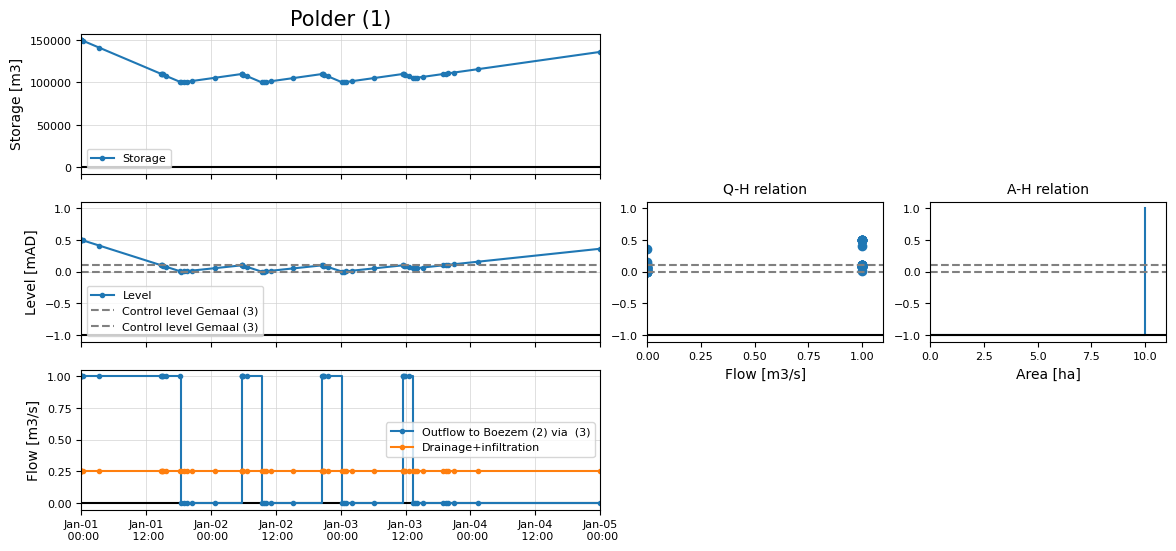

In [53]:
basin_results, fig = plot_results_basin_ribasim_model(
    ribasim_model=model,
    simulation_path=simulation_path,
    basin_no=1
);

In [25]:
basin_results.outflow_edge

,name,from_node_id,to_node_id,edge_type,geometry,from_node_name,to_node_name,source_node_id,source_name,target_node_id,target_name
0,,1,3,flow,"LINESTRING (0.000 0.000, 1.000 0.000)",Polder,,-1,,2,Boezem


In [9]:
basin_no = 1
inflow_edge = (ribasim_results.flow_edge[ribasim_results.flow_edge.to_node_id==basin_no]
               .drop("to_node_id", axis=1).set_index(['from_node_id']))
outflow_edge = (ribasim_results.flow_edge[ribasim_results.flow_edge.from_node_id==basin_no]
                .drop("from_node_id", axis=1).set_index(['to_node_id']))

In [10]:
ribasim_results.flow_edge

,name,from_node_id,to_node_id,edge_type,geometry,from_node_name,to_node_name,source_node_id,source_name,target_node_id,target_name
0,,1,3,flow,"LINESTRING (0.000 0.000, 1.000 0.000)",Polder,,-1,,2,Boezem
1,,3,2,flow,"LINESTRING (1.000 0.000, 2.000 0.000)",,Boezem,1,Polder,-1,


In [11]:
outflow_edge

,name,edge_type,geometry,from_node_name,to_node_name,source_node_id,source_name,target_node_id,target_name
to_node_id,,,,,,,,,
3,,flow,"LINESTRING (0.000 0.000, 1.000 0.000)",Polder,,-1,,2,Boezem


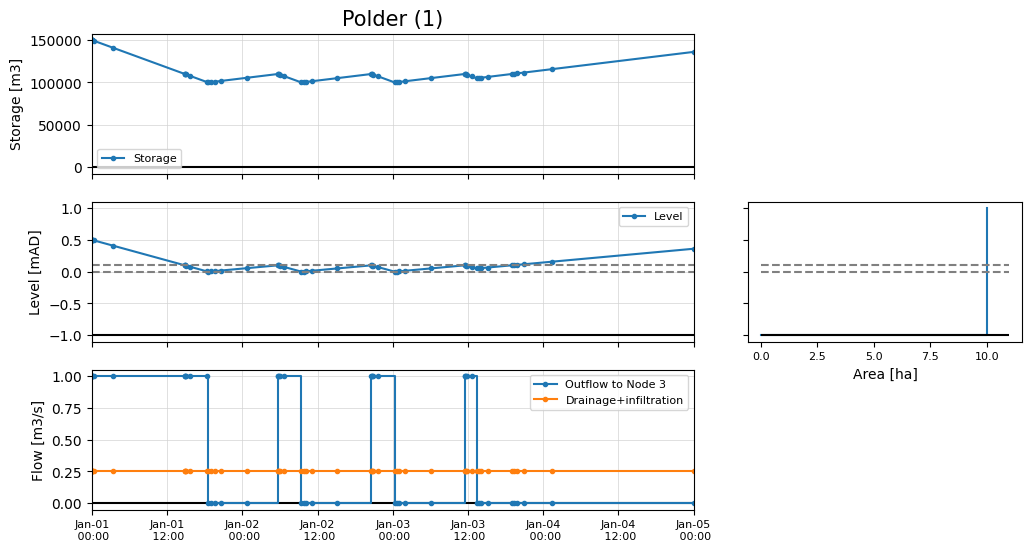

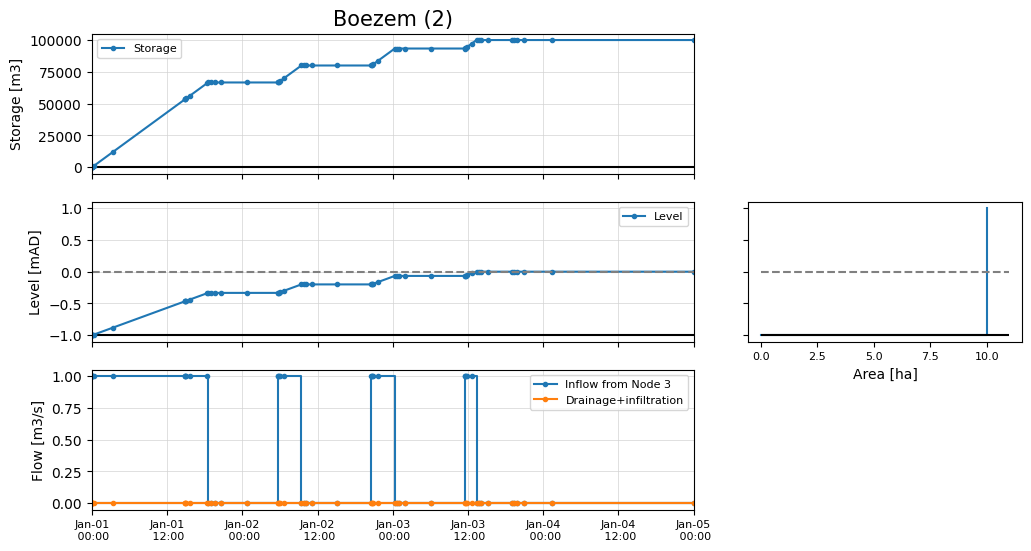

In [12]:
plot_results_basins_ribasim_model(
    ribasim_model=model,
    simulation_path=simulation_path,
);

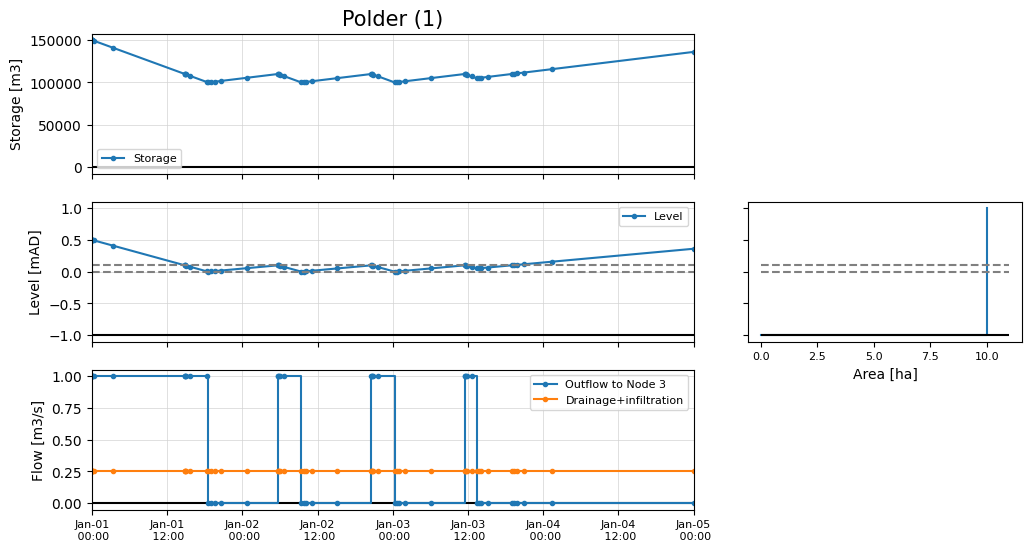

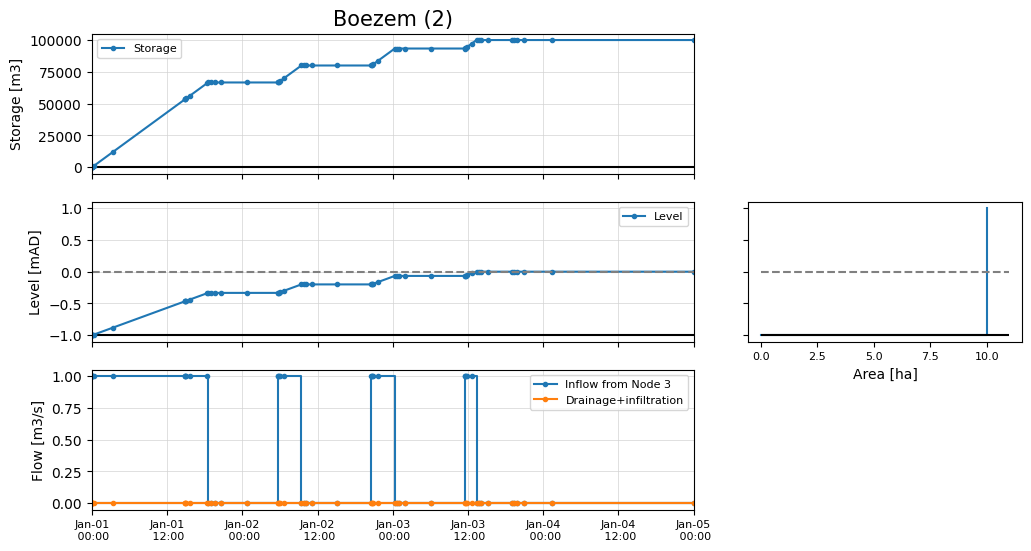

In [13]:
plot_results_basins_ribasim_model(
    ribasim_model=model,
    simulation_path=simulation_path,
)